In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv.xls')

print(data.columns)

print(data.head())

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# One-hot encode the 'Gender' column
X = pd.get_dummies(X, columns=['Gender'])

# Display the first few rows of the updated dataset
print(X.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39          False   
1           2   21                  15                      81          False   
2           3   20                  16                       6           True   
3           4   23                  16                      77           True   
4           5   31                  17                      40           True   

   Gender_Male  
0         True  
1         True  
2        False  
3        False  
4        False  


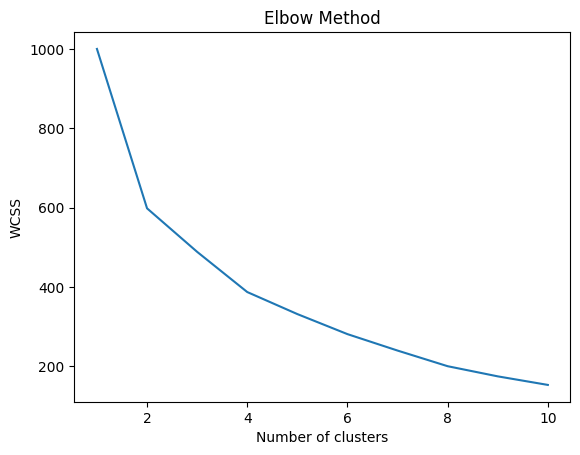

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=['CustomerID']))

# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans


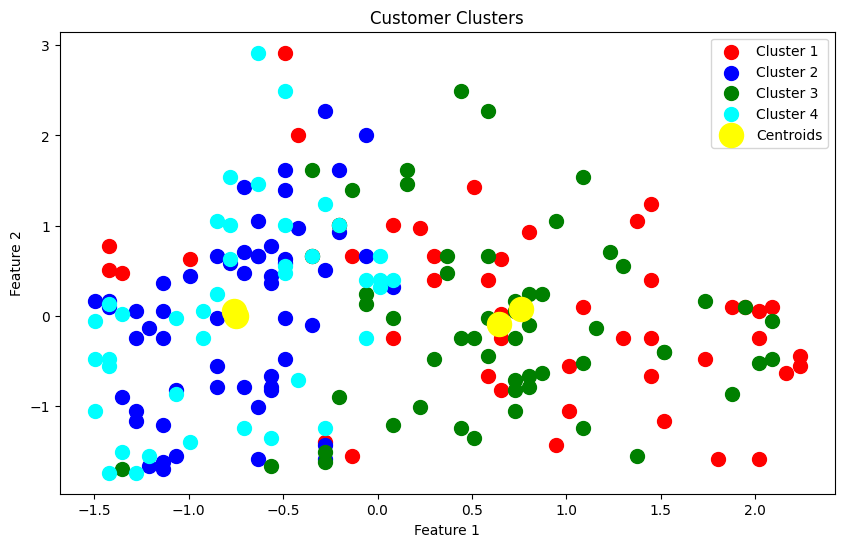

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        3  
2        2  
3        1  
4        2  


In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

# Using only the first two features for 2D visualization
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Display the data with cluster labels
print(data.head())
